# Enable accessing ***Google Drive*** through colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Dataset and print some information about it

In [95]:
import pandas as pd

data_file = r"/content/drive/MyDrive/Iris.csv"
data = pd.read_csv(data_file)

In [96]:
print(data.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [97]:
print(len(data.columns))

6


In [98]:
print(len(data))

150


In [100]:
print(data)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [137]:
X = data.iloc[:,  :5]
y = data.iloc[: , 5:]

In [138]:
print(X)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]


In [139]:
print(y)

            Species
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[150 rows x 1 columns]


# Plot data using ***Elbow Plot*** to know the optimal number of clusters from 1 to 10

In [140]:
from sklearn.cluster import KMeans

In [141]:
ks = []
scores = []
for i in range(1, 11):
    kmeans_i = KMeans(i)
    model_i = kmeans_i.fit(X)
    score = model_i.score(X)
    scores.append(abs(score))
    ks.append(i)

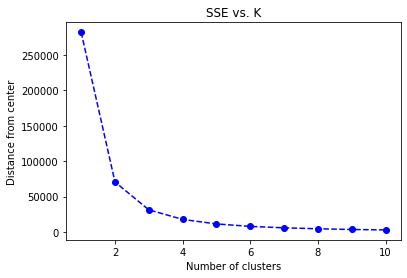

In [142]:
import matplotlib.pyplot as plt

plt.plot(ks, scores, linestyle='--', marker='o', color='b');
plt.xlabel('Number of clusters');
plt.ylabel('Distance from center');
plt.title('SSE vs. K');

The optimal number of clusters according to the plot is 3

# Train the ***KMeans*** model with number of clusters = 3

In [143]:
kmeans_3 = KMeans(3)

# Then fit the model to your data using the fit method
kmeans_3 = kmeans_3.fit(X)

# Finally predict the labels on the same data to show the category that point belongs to
labels_3 = kmeans_3.predict(X)

In [144]:
print(labels_3)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


# Plot the dataset before and after clustering (with number of clusters = 3)

In [156]:
from mpl_toolkits.mplot3d import Axes3D

def plotData_3D(df_before_clustering, centroids, labels, title_, name1, name2):
    #axes = Axes3D(fig)
    fig = plt.figure(figsize=(11, 5))
    fig.suptitle(title_, fontsize=16)
    
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.scatter(df_before_clustering.iloc[:, 0], df_before_clustering.iloc[:, 1], alpha=0.5)
    
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.scatter(df_before_clustering.iloc[:, 0], df_before_clustering.iloc[:, 1], c=labels, alpha=0.5,  cmap='tab10')
    ax2.scatter(centroids[:, 0], centroids[:,1], marker="o", s=100, c='r', alpha=1)
    
    ax1.set_title(name1)
    ax2.set_title(name2)
    plt.show()

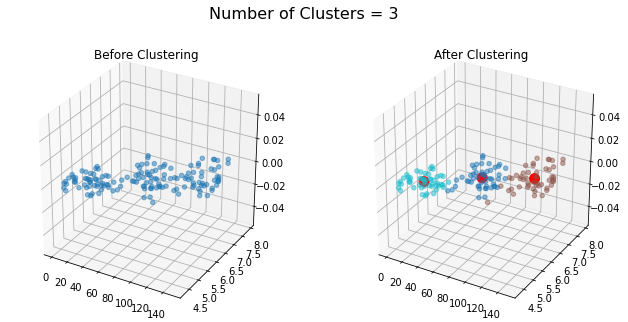

In [157]:
plotData_3D(data, kmeans_3.cluster_centers_, labels_3, 'Number of Clusters = 3', 'Before Clustering', 'After Clustering')

In [160]:
def plot(df_before_clustering, centroids, labels, title_, name1, name2):
    f, axes = plt.subplots(1, 2, figsize=(11, 5))
    f.suptitle(title_, fontsize=16)

    axes[0].scatter(df_before_clustering.iloc[:, 0], df_before_clustering.iloc[:, 1], alpha=0.5)
    axes[1].scatter(df_before_clustering.iloc[:, 0], df_before_clustering.iloc[:, 1], c=labels, alpha=1,  cmap='tab10')
    axes[1].scatter(centroids[:, 0], centroids[:,1], marker="o", s=100, c='r')

    axes[0].set_title(name1)
    axes[1].set_title(name2)
    plt.show()

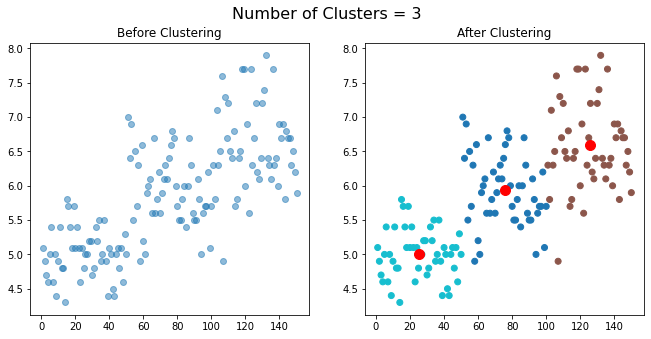

In [161]:
plot(data, kmeans_3.cluster_centers_, labels_3, 'Number of Clusters = 3', 'Before Clustering', 'After Clustering')